# Тема “Обучение без учителя”

### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [8]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [14]:
data_array = boston['data']
features = boston['feature_names']
target = boston['target']
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [16]:
print(target.shape)
print(data_array.shape)

(506,)
(506, 13)


Создайте датафреймы X и y из этих данных.

In [21]:
X = pd.DataFrame(data_array, columns = features)

In [22]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [76]:
y = pd.DataFrame(target, columns = ['price'])

In [77]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

Масштабируйте данные с помощью StandardScaler.

In [79]:
from sklearn.preprocessing import StandardScaler

In [33]:
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [35]:
from sklearn.manifold import TSNE

In [40]:
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)
X_train_tsne = tsne.fit_transform(X_train)

print(X_train_scaled.shape, X_train_tsne.shape)

(404, 13) (404, 2)


Постройте диаграмму рассеяния на этих данных.

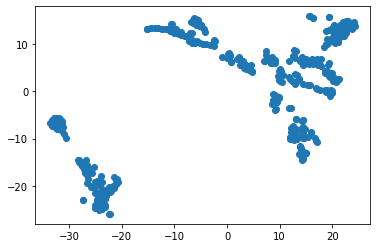

In [80]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [48]:
from sklearn.cluster import KMeans

In [63]:
model = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

In [64]:
X_clusters = model.fit_predict(X_train_scaled)

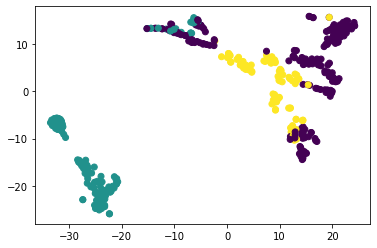

In [65]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c = X_clusters)

Вычислите средние значения price и CRIM в разных кластерах.

In [89]:
print('CRIM.mean: ')
for i in range(0,3):
    print('Cluster {}: '.format(i), X_train[X_clusters == i]['CRIM'].mean())

print('\nprice.mean: ')
for i in range(0,3):    
    print('Cluster {}: '.format(i), y_train[X_clusters == i]['price'].mean())

CRIM.mean: 
Cluster 0:  0.4216602094240837
Cluster 1:  10.797028425196851
Cluster 2:  0.07356558139534884

price.mean: 
Cluster 0:  24.958115183246072
Cluster 1:  16.165354330708663
Cluster 2:  27.78837209302326


### * Задание 3 

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [90]:
X_test_clusters = model.predict(X_test_scaled)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [92]:
print('CRIM.mean: ')
for i in range(0,3):
    print('Cluster {}: '.format(i), X_test[X_test_clusters == i]['CRIM'].mean())

print('\nprice.mean: ')
for i in range(0,3):    
    print('Cluster {}: '.format(i), y_test[X_test_clusters == i]['price'].mean())

CRIM.mean: 
Cluster 0:  0.2660788235294118
Cluster 1:  10.165531142857143
Cluster 2:  0.06206

price.mean: 
Cluster 0:  21.860784313725492
Cluster 1:  16.43714285714286
Cluster 2:  31.35
